## IBS-2 Project by Group-9 Batch-B

##### Team Members:

1) Suriya K P - CB.EN.U4AIE22164
2) I.V.Srichandra - CB.EN.U4AIE22165
3) Durai Singh - CB.EN.U4AIE22167

### Predicting Viral Host based on Metagenomic Features

#### Dataset

The virus dataset consists of 7,362 entries, each detailing various aspects of viral genomics and taxonomy. It includes information on virus names, taxonomic groups, and biological sample identifiers, although the latter is often missing. The dataset covers 4,893 unique virus names classified into 17 distinct taxonomic groups. Each entry has a unique assembly accession number, indicating a specific version of the genome assembly, and all entries are marked as "Complete." Genome sizes and GC content vary among the viruses. The dataset also provides information about the host organisms, which include bacteria, fungi, plants, and vertebrates, reflecting the diverse range of virus-host interactions. Additionally, it lists the number of coding sequences (CDS) per virus and includes FTP links to GenBank and RefSeq entries, offering access to detailed genomic data. While some columns like "BioSample" and "Neighbors" have many missing values, most columns are well-populated, making this dataset a rich resource for virologists and researchers studying viral diversity and genomics.


In [6]:
import numpy as np 
import pandas as pd 

# Load the data
virus_csv_file = 'viruses.csv'
viruses_df = pd.read_csv(virus_csv_file)
viruses_df.head(5)



,#Organism Name,Organism Groups,BioSample,BioProject,Assembly,Level,Size(Mb),GC%,Replicons,Host,CDS,Neighbors,Release Date,GenBank FTP,RefSeq FTP,Replicons.1
0,Hamiltonella virus APSE1,"Viruses;dsDNA viruses, no RNA stage;Podoviridae",NaN,PRJNA14047,GCA_000837745.1,Complete,0.036524,43.900,Unknown:NC_000935.1/AF157835.1,bacteria,54,NaN,1999-10-26T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Unknown:NC_000935.1/AF157835.1
1,Chalara elegans RNA Virus 1,Viruses;dsRNA viruses;Totiviridae,NaN,PRJNA15126,GCA_000858705.1,Complete,0.005310,52.600,Unknown:NC_005883.1/AY561500.1,fungi,2,NaN,2004-03-23T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Unknown:NC_005883.1/AY561500.1
2,Vibrio phage martha 12B12,"Viruses;dsDNA viruses, no RNA stage;Myoviridae",NaN,PRJNA39219,GCA_000904715.1,Complete,0.033277,45.800,Unknown:NC_021070.1/HQ316581.1,bacteria,51,NaN,2013-03-11T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Unknown:NC_021070.1/HQ316581.1
3,Sclerotinia sclerotiorum partitivirus S,Viruses;dsRNA viruses;Partitiviridae,NaN,PRJNA39595,GCA_000884095.1,Complete,0.003726,44.145,RNA 1:NC_013014.1/GQ280377.1; RNA 2:NC_01301...,plants,2,NaN,2009-07-21T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,RNA 1:NC_013014.1/GQ280377.1; RNA 2:NC_01301...
4,Human papillomavirus 116,"Viruses;dsDNA viruses, no RNA stage;Papillomav...",NaN,PRJNA39691,GCA_000884175.1,Complete,0.007184,38.500,Unknown:NC_013035.1/FJ804072.1,vertebrates,7,NaN,2009-07-28T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Unknown:NC_013035.1/FJ804072.1


In [7]:

viruses_df.columns = ['organism_name', 'organism_groups', 'BioSample', 'Bioproject', 'Assembly', 'Level', 'size_mb', 'gc_percent', 'replicons', 'host', 'cds', 'neighbours', 'release_date', 'genbank_ftp', 'refseq_ftp', 'replicons1']

# verify column names have been changed
viruses_df.head(1)

,organism_name,organism_groups,BioSample,Bioproject,Assembly,Level,size_mb,gc_percent,replicons,host,cds,neighbours,release_date,genbank_ftp,refseq_ftp,replicons1
0,Hamiltonella virus APSE1,"Viruses;dsDNA viruses, no RNA stage;Podoviridae",NaN,PRJNA14047,GCA_000837745.1,Complete,0.036524,43.9,Unknown:NC_000935.1/AF157835.1,bacteria,54,NaN,1999-10-26T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,Unknown:NC_000935.1/AF157835.1


In [8]:
#Explore the data

print('Number of viruses: ', viruses_df.shape[0])

print('Number of unique viral host types: ', (len(viruses_df['host'].unique())))

viruses_df['host'].unique()

Number of viruses:  7362
Number of unique viral host types:  14


array(['bacteria', 'fungi', 'plants', 'vertebrates', 'invertebrates',
       'protozoa', 'vertebrates, invertebrates, human',
       'invertebrates, plants', 'algae', 'vertebrates, invertebrates',
       'vertebrates, human', 'archaea', 'human', nan], dtype=object)

In [9]:
ohe_df = pd.get_dummies(viruses_df['host'], prefix='host')
ohe_df.head(5)

,host_algae,host_archaea,host_bacteria,host_fungi,host_human,host_invertebrates,"host_invertebrates, plants",host_plants,host_protozoa,host_vertebrates,"host_vertebrates, human","host_vertebrates, invertebrates","host_vertebrates, invertebrates, human"
0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0


In [10]:
# drop columns we don't need 
virus_feats_only = viruses_df.drop(['organism_name', 'organism_groups', 'BioSample', 
                                    'Bioproject', 'Assembly', 'Level', 'replicons', 
                                    'neighbours', 'release_date', 'genbank_ftp', 'refseq_ftp',
                                   'replicons1'], axis=1)


# create dict to map strings to numerical values, also combines overlapping hosts: vertebrates/human and human
viruses_host_dict = {'bacteria': 0, 'fungi': 1, 'plants': 2, 'vertebrates': 3,
                    'invertebrates': 4, 'protozoa': 5, 'vertebrates, invertebrates, human': 6,
                    'invertebrates, plants': 7, 'algae': 8, 'vertebrates, invertebrates': 9,
                    'vertebrates, human': 10, 'archaea': 11, 'human': 10}

virus_feats_cleanhost = virus_feats_only.replace({'host':viruses_host_dict})

first_col = virus_feats_cleanhost.pop('host')
virus_feats_cleanhost.insert(0, 'host', first_col)
virus_feats_cleanhost.head(5)

,host,size_mb,gc_percent,cds
0,0.0,0.036524,43.900,54
1,1.0,0.005310,52.600,2
2,0.0,0.033277,45.800,51
3,2.0,0.003726,44.145,2
4,3.0,0.007184,38.500,7


In [11]:
# check for NaN values in data

print("Count of NaN in host: ", virus_feats_cleanhost['host'].isnull().sum())
print("Count of NaN in Size_Mb: ", virus_feats_cleanhost['size_mb'].isnull().sum())
print("Count of NaN in GC_percent: ", virus_feats_cleanhost['gc_percent'].isnull().sum())
print("Count of NaN in cds: ", virus_feats_cleanhost['cds'].isnull().sum())

viruses_dropped_nan = virus_feats_cleanhost.dropna()

print("Count of NaN after dropna(): ", viruses_dropped_nan['host'].isnull().sum())

viruses_dropped_nan.head(5)
display(viruses_dropped_nan)

Count of NaN in host:  8
Count of NaN in Size_Mb:  0
Count of NaN in GC_percent:  0
Count of NaN in cds:  0
Count of NaN after dropna():  0


,host,size_mb,gc_percent,cds
0,0.0,0.036524,43.9000,54
1,1.0,0.005310,52.6000,2
2,0.0,0.033277,45.8000,51
3,2.0,0.003726,44.1450,2
4,3.0,0.007184,38.5000,7
...,...,...,...,...
7357,10.0,0.018039,31.7387,12
7358,10.0,0.018615,33.5171,11
7359,10.0,0.018615,32.9612,11
7360,10.0,0.018039,31.9355,11


### Distribution of Data


In [12]:
# Check distribution of viral hosts
counts_host2 = viruses_dropped_nan.copy()
counts_host_unique = counts_host2.groupby(['host']).size().reset_index(name='Counts')

counts_host_unique

,host,Counts
0,0.0,3787
1,1.0,55
2,2.0,306
3,3.0,550
4,4.0,107
5,5.0,34
6,6.0,8
7,7.0,11
8,8.0,34
9,9.0,17


([<matplotlib.axis.XTick at 0x18055b38280>,
 [Text(0, 0, 'bact'),
  Text(1, 0, 'fungi'),
  Text(2, 0, 'plants'),
  Text(3, 0, 'verts'),
  Text(4, 0, 'inverts'),
  Text(5, 0, 'pro'),
  Text(6, 0, 'v/i/hum'),
  Text(7, 0, 'i/plants'),
  Text(8, 0, 'algae'),
  Text(9, 0, 'v/i'),
  Text(10, 0, 'v/hum'),
  Text(11, 0, 'archaea')])

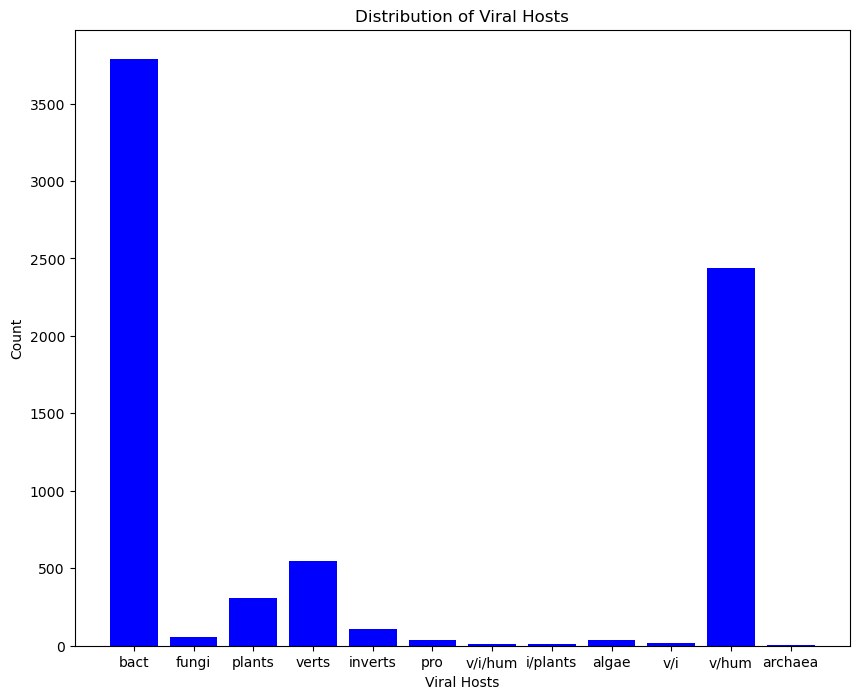

In [13]:
# Plot distribution of viral hosts

import matplotlib.pyplot as plt
%matplotlib inline

group = ['host']
counts = viruses_dropped_nan.groupby(group).size().reset_index(name="Counts")

bars = ('bact', 'fungi', 'plants', 'verts', 'inverts',
        'pro', 'v/i/hum',
        'i/plants', 'algae', 'v/i',
        'v/hum', 'archaea')
y_pos = np.arange(len(bars))

#plt.title('Distribution of Unique Host Types')
plt.figure(figsize=(10,8))
plt.bar(range(len(counts)), counts['Counts'], color = 'blue')
plt.title('Distribution of Viral Hosts')
plt.xlabel('Viral Hosts')
plt.ylabel('Count')
plt.xticks(y_pos, bars)

Number of unique size values:  5233
count    7354.000000
mean        0.051478
std         0.055856
min         0.000174
25%         0.017989
50%         0.033620
75%         0.057983
max         0.497513
Name: size_mb, dtype: float64
mode of Size_Mb is:  0    0.017433
Name: size_mb, dtype: float64
count zeroes is:  0


Text(0, 0.5, 'Count')

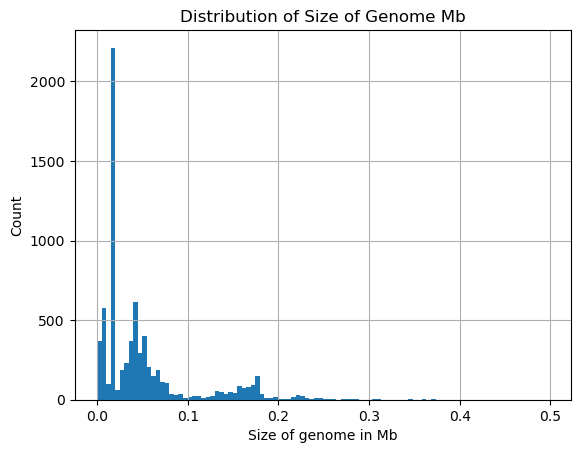

In [14]:
# Get stats for viral genome size (size_mb) and plot distribution

print('Number of unique size values: ', (len(viruses_dropped_nan['size_mb'].unique())))

print(viruses_dropped_nan.size_mb.describe())

print("mode of Size_Mb is: ", viruses_dropped_nan['size_mb'].mode())

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=0, strategy = 'mean')

cleaned_sizemb_df = viruses_dropped_nan['size_mb']

drop_host = viruses_dropped_nan.drop(['host'], axis=1)

imp.fit(drop_host)

cleaned_df = imp.transform(drop_host)

cleaned_df = pd.DataFrame(data=cleaned_df, columns=["size_mb", "gc_percent", "cds"])

cleaned_size = cleaned_df['size_mb']

print("count zeroes is: ", cleaned_size.isin([0]).sum())

cleaned_size = cleaned_size.sort_values()
cleaned_size.hist(bins = 100)
plt.title('Distribution of Size of Genome Mb')
plt.xlabel('Size of genome in Mb')
plt.ylabel('Count')

Number of unique GC% values:  2789
count    7362.000000
mean       43.230327
std        11.971189
min         0.000000
25%        32.370900
50%        39.500000
75%        51.600000
max        78.800000
Name: gc_percent, dtype: float64
Most frequent value is  0    42.2
Name: gc_percent, dtype: float64


Text(0, 0.5, 'Count')

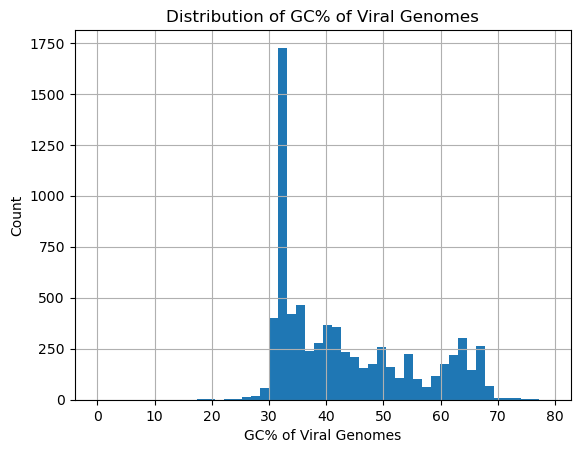

In [15]:
# Get stats for GC% (gc_percent) and plot distribution

print('Number of unique GC% values: ', (len(viruses_df['gc_percent'].unique())))

print(viruses_df.gc_percent.describe())

gc_sorted_df = viruses_df['gc_percent']
gc_sorted_df = gc_sorted_df.sort_values()

print('Most frequent value is ', gc_sorted_df.mode() )
gc_sorted_df.hist(bins = 50)
plt.title('Distribution of GC% of Viral Genomes')
plt.xlabel('GC% of Viral Genomes')
plt.ylabel('Count')

Number of unique CDS values:  363
count    7362.000000
mean       67.090736
std        80.363440
min         0.000000
25%        11.000000
50%        46.000000
75%        90.000000
max       886.000000
Name: cds, dtype: float64
Most frequent value is  0    11
Name: cds, dtype: int64
count zeroes is  32


Text(0, 0.5, 'Count')

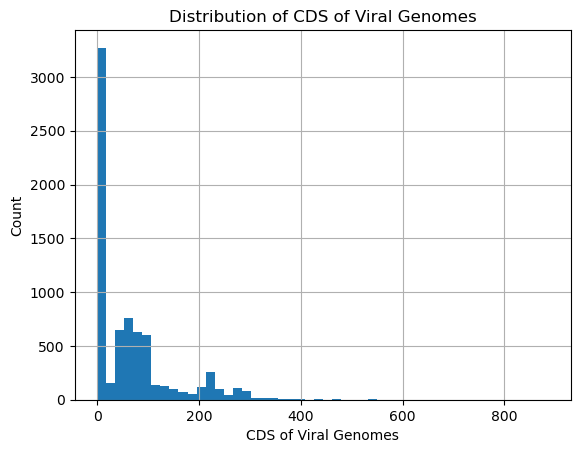

In [16]:
# Get stats for CDS (cds) and plot distribution

print('Number of unique CDS values: ', (len(viruses_df['cds'].unique())))

print(viruses_df.cds.describe())

cds_sorted_df = viruses_df['cds']
cds_sorted_df = cds_sorted_df.sort_values()

print('Most frequent value is ', cds_sorted_df.mode() )

print('count zeroes is ', cds_sorted_df.isin([0]).sum() )

cds_sorted_df.hist(bins = 50)
plt.title('Distribution of CDS of Viral Genomes')
plt.xlabel('CDS of Viral Genomes')
plt.ylabel('Count')

### Pre-process Data


In [17]:
# Pre-process Data

from sklearn import preprocessing

new_viral_df = viruses_dropped_nan.copy()

targets_host = new_viral_df.pop('host')

x = new_viral_df.values

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

unclean_viral_df = pd.DataFrame(x_scaled)

unclean_viral_df.insert(0, 'host', targets_host)

# remove the NaN values!
new_df_clean = unclean_viral_df.dropna()

new_df_clean.columns = ['host', 'size_mb', 'gc_percent', 'cds']
new_df_clean.head(5)

,host,size_mb,gc_percent,cds
0,0.0,0.073089,0.557107,0.060948
1,1.0,0.010327,0.667513,0.002257
2,0.0,0.066560,0.581218,0.057562
3,2.0,0.007142,0.560216,0.002257
4,3.0,0.014095,0.488579,0.007901


In [18]:


# create features and labels
y = new_df_clean['host']
X = new_df_clean.drop(['host'], axis=1)
y.columns = ['host']

X.head(5)

,size_mb,gc_percent,cds
0,0.073089,0.557107,0.060948
1,0.010327,0.667513,0.002257
2,0.066560,0.581218,0.057562
3,0.007142,0.560216,0.002257
4,0.014095,0.488579,0.007901


### SVC Model - Linear Kernel

In [19]:

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# start with linear kernel

linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
                                            
linear_pred = linear.predict(X_test)

# retrieve accuracy
accuracy_lin = linear.score(X_test, y_test)

print("acc linear kernel: ", accuracy_lin)

cm_lin = confusion_matrix(y_test, linear_pred)
print(cm_lin)

# precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, linear_pred))



acc linear kernel:  0.7959183673469388
[[710   0   0   0   0   0   0   0   0  34   0]
 [ 11   0   0   0   0   0   0   0   0   0   0]
 [ 43   0   0   0   0   0   0   0   0  28   0]
 [ 81   0   0   0   0   0   0   0   0  30   0]
 [ 21   0   0   0   0   0   0   0   0   1   0]
 [ 10   0   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   2   0]
 [  8   0   0   0   0   0   0   0   0   1   0]
 [  3   0   0   0   0   0   0   0   0   2   0]
 [ 20   0   0   0   0   0   0   0   0 460   0]
 [  2   0   0   0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.78      0.95      0.86       744
         1.0       0.00      0.00      0.00        11
         2.0       0.00      0.00      0.00        71
         3.0       0.00      0.00      0.00       111
         4.0       0.00      0.00      0.00        22
         5.0       0.00      0.00      0.00        10
         6.0       0.00      0.00      0.00         5
         8

c:\Users\pamou\OneDrive\Documents\ml_2\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pamou\OneDrive\Documents\ml_2\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pamou\OneDrive\Documents\ml_2\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVC Model - RBF Kernel


In [20]:
# now try rbf kernel

rbf = svm.SVC(kernel='rbf', C=1, decision_function_shape='ovo', probability=True).fit(X_train, y_train)
rbf_pred = rbf.predict(X_test)

accuracy_rbf = rbf.score(X_test, y_test)
print("acc rbf kernel: ", accuracy_rbf)

cm_rbf = confusion_matrix(y_test, linear_pred)
print(cm_rbf)

print(classification_report(y_test, rbf_pred))


acc rbf kernel:  0.845578231292517
[[710   0   0   0   0   0   0   0   0  34   0]
 [ 11   0   0   0   0   0   0   0   0   0   0]
 [ 43   0   0   0   0   0   0   0   0  28   0]
 [ 81   0   0   0   0   0   0   0   0  30   0]
 [ 21   0   0   0   0   0   0   0   0   1   0]
 [ 10   0   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   2   0]
 [  8   0   0   0   0   0   0   0   0   1   0]
 [  3   0   0   0   0   0   0   0   0   2   0]
 [ 20   0   0   0   0   0   0   0   0 460   0]
 [  2   0   0   0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93       744
         1.0       0.00      0.00      0.00        11
         2.0       0.52      0.15      0.24        71
         3.0       0.40      0.59      0.48       111
         4.0       0.00      0.00      0.00        22
         5.0       0.00      0.00      0.00        10
         6.0       0.00      0.00      0.00         5
         8.0  

c:\Users\pamou\OneDrive\Documents\ml_2\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pamou\OneDrive\Documents\ml_2\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pamou\OneDrive\Documents\ml_2\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest Classifier

In [21]:
# from random forest classifier
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [25, 40, 50, 60, 65],  # Number of trees in the forest
    'max_depth': [5, 10, 15, 20],     # Maximum depth of individual trees
    'min_samples_split': [4, 5, 6, 8], # Minimum samples required to split a node
    'min_samples_leaf': [2, 3],   # Minimum samples required at each leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider at each split
}

rf = RandomForestClassifier(random_state=11)  # Set a fixed random state

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=4, n_jobs = -1)
grid_search.fit(X_train, y_train)
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Estimator:", best_estimator)
print("Best Parameters:", best_params)

c:\Users\pamou\OneDrive\Documents\ml_2\env\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


Best Estimator: RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=50, random_state=11)
Best Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 50}


In [22]:
# rf = RandomForestClassifier(random_state=11, params=best_params)
# rf.fit(X_train, y_train)
# rf_pred = rf.predict(X_test)

# accuracy_rf = rf.score(X_test, y_test)
# print("acc random forest: ", accuracy_rf)

# cm_rf = confusion_matrix(y_test, rf_pred)
# print('confusion-matrix')
# print(cm_rf)

# print(classification_report(y_test, rf_pred))


In [23]:
# Assuming you have best_params obtained from GridSearchCV
# Define class weights (adjust based on your class distribution)
class_weights = {y: 1.0 for y in np.unique(y_train)}  # Equal weights for now
if np.unique(y_train).shape[0] > 2:  # Check for more than 2 classes
    # Calculate class weights based on inverse class frequencies
    class_weights = {
        y: (len(y_train) / np.sum(y_train == y))
        for y in np.unique(y_train)
    }

rf = RandomForestClassifier(random_state=11, **best_params, class_weight=class_weights)  # Unpack best_params

rf.fit(X_train, y_train)  # Train with class weights

rf_pred = rf.predict(X_test)

accuracy_rf = rf.score(X_test, y_test)
print("acc random forest: ", accuracy_rf)

cm_rf = confusion_matrix(y_test, rf_pred)
print('confusion-matrix')
print(cm_rf)

print(classification_report(y_test, rf_pred))  # Report on test data


acc random forest:  0.9129251700680272
confusion-matrix
[[707   0   8  12   3   0   0   0   1   0  13   0]
 [  0   4   4   1   0   2   0   0   0   0   0   0]
 [ 12   0  55   3   0   1   0   0   0   0   0   0]
 [  6   2  12  87   2   0   0   0   1   0   1   0]
 [  2   0   1   0  18   0   0   0   0   1   0   0]
 [  0   1   1   1   0   7   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   2   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  5   0   1   0   1   0   0   1   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4   1   0]
 [ 16   0   1   6   0   0   0   0   0   0 457   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       744
         1.0       0.57      0.36      0.44        11
         2.0       0.66      0.77      0.71        71
         3.0       0.79      0.78      0.79       111
         4.0       0.75      0.82      0.78        22
      

c:\Users\pamou\OneDrive\Documents\ml_2\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pamou\OneDrive\Documents\ml_2\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pamou\OneDrive\Documents\ml_2\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\

## Decision tree classifier

In [24]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

accuracy_dt = dt.score(X_test, y_test)
print("acc decision tree: ", accuracy_dt)

cm_dt = confusion_matrix(y_test, dt_pred)
print('confusion-matrix')
print(cm_dt)

print(classification_report(y_test, dt_pred))



acc decision tree:  0.8775510204081632
confusion-matrix
[[695   1   8  13   7   1   0   0   2   0  17   0]
 [  0   4   5   2   0   0   0   0   0   0   0   0]
 [ 13   0  48   7   1   1   0   0   0   0   1   0]
 [ 18   2  12  68   2   0   0   0   1   0   8   0]
 [  1   0   2   1  16   0   0   0   1   1   0   0]
 [  2   2   1   2   0   3   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   2   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  4   0   1   0   1   0   0   1   2   0   0   0]
 [  0   0   0   0   1   0   0   0   0   3   1   0]
 [ 23   1   0   7   0   0   0   0   0   0 449   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93       744
         1.0       0.40      0.36      0.38        11
         2.0       0.62      0.68      0.65        71
         3.0       0.68      0.61      0.64       111
         4.0       0.57      0.73      0.64        22
      

c:\Users\pamou\OneDrive\Documents\ml_2\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pamou\OneDrive\Documents\ml_2\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pamou\OneDrive\Documents\ml_2\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\

In [25]:
# from sklearn.model_selection import cross_val_score

# clf_cross_val = svm.SVC(kernel='rbf', C=1, decision_function_shape='ovo')

# scores = cross_val_score(clf_cross_val, X, y, cv=10)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [26]:
import tensorflow as tf
from tensorflow import keras

In [74]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, activation = 'relu', input_shape = (3,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(12, activation = 'softmax'))

In [75]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], loss_weights= class_weights.values())

In [76]:
model.fit(X_train, y_train, epochs = 500, batch_size = 118, validation_data = (X_test, y_test))

Epoch 1/500
50/50 [==============================] - 1s 11ms/step - loss: 4.3693 - accuracy: 0.4178 - val_loss: 3.5363 - val_accuracy: 0.5061
Epoch 2/500
50/50 [==============================] - 0s 5ms/step - loss: 2.7413 - accuracy: 0.5179 - val_loss: 2.5034 - val_accuracy: 0.5061
Epoch 3/500
50/50 [==============================] - 0s 4ms/step - loss: 2.2543 - accuracy: 0.5179 - val_loss: 2.2976 - val_accuracy: 0.5061
Epoch 4/500
50/50 [==============================] - 0s 4ms/step - loss: 2.0349 - accuracy: 0.6600 - val_loss: 2.0747 - val_accuracy: 0.7966
Epoch 5/500
50/50 [==============================] - 0s 4ms/step - loss: 1.7775 - accuracy: 0.8108 - val_loss: 1.8713 - val_accuracy: 0.7884
Epoch 6/500
50/50 [==============================] - 0s 4ms/step - loss: 1.6070 - accuracy: 0.8108 - val_loss: 1.7598 - val_accuracy: 0.7946
Epoch 7/500
50/50 [==============================] - 0s 5ms/step - loss: 1.5062 - accuracy: 0.8133 - val_loss: 1.6810 - val_accuracy: 0.7932
Epoch 8/500


In [82]:
ann_pred = model.predict(X_test)

cm_ann = confusion_matrix(y_test, np.argmax(ann_pred, axis = 1))
print('confusion-matrix')
print(cm_ann)

print(classification_report(y_test, np.argmax(ann_pred, axis = 1)))

46/46 [==============================] - 0s 3ms/step
confusion-matrix
[[706   0  10   9   4   0   0   1   0   0  14   0]
 [  0   3   5   3   0   0   0   0   0   0   0   0]
 [ 12   0  52   6   0   0   0   0   0   0   1   0]
 [  9   4  14  81   2   0   0   0   0   0   1   0]
 [  2   0   1   1  16   0   0   0   1   1   0   0]
 [  0   2   7   1   0   0   0   0   0   0   0   0]
 [  0   0   0   3   0   0   0   0   0   2   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   1   1   1   0   0   0   4   0   0   0]
 [  0   0   0   2   0   0   0   0   0   2   1   0]
 [ 14   0   1   7   0   0   0   0   0   0 458   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       744
         1.0       0.33      0.27      0.30        11
         2.0       0.57      0.73      0.64        71
         3.0       0.71      0.73      0.72       111
         4.0       0.70      0.73      0.71   

c:\Users\pamou\OneDrive\Documents\ml_2\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pamou\OneDrive\Documents\ml_2\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pamou\OneDrive\Documents\ml_2\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\

In [78]:
print(ann_pred[:1])

[[9.6749538e-01 3.7144730e-04 7.3324777e-03 3.8337887e-03 5.5774915e-05
  1.2585977e-03 1.4571096e-24 2.4200855e-37 2.1706008e-05 2.8925265e-26
  1.9159975e-02 4.7073621e-04]]


In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.10.0
2.10.0
